In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('C:/Users/HARSH/Documents/My Data/study material/Python/Loan Eligibility Predictions/train.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
train_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
train_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

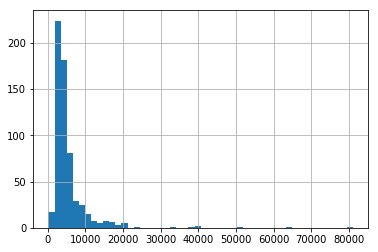

In [13]:
train_data['ApplicantIncome'].hist(bins=50)

In [14]:
frequency1 = train_data['Credit_History'].value_counts(ascending=True)
frequency2 = train_data.pivot_table(index='Credit_History', values='Loan_Status', aggfunc=lambda x: x.map({'Y': 1, 'N': 0}).mean())
frequency3 = train_data['Education'].value_counts(ascending=True)
frequency4 = train_data.pivot_table(index='Education', values='Loan_Status', aggfunc=lambda x: x.map({'Y': 1, 'N': 0}).mean())

print('Frequency Table for Credit History: ')
print(frequency1)
print('\nFrequency Table for Education: ')
print(frequency3)
print('\nProbabilty of getting a loan by Credit History: ')
print(frequency2)
print('\nProbability of getting a loan by Education: ')
print(frequency4)

Frequency Table for Credit History: 
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Frequency Table for Education: 
Not Graduate    134
Graduate        480
Name: Education, dtype: int64

Probabilty of getting a loan by Credit History: 
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789

Probability of getting a loan by Education: 
              Loan_Status
Education                
Graduate         0.708333
Not Graduate     0.611940


In [15]:
crosstab1 = pd.crosstab(train_data["Credit_History"], train_data["Loan_Status"], margins=True)
crosstab2 = pd.crosstab(train_data["Education"], train_data["Loan_Status"], margins=True)

# Yes/No based on Credit History
crosstab1

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [16]:
# Yes/No based on education
crosstab2

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [19]:
#Data Preprocessing

# Reading and joining the test dataset to the train dataset for pre-processing (will seperate again after this stage to test model)
test_data = pd.read_csv('C:/Users/HARSH/Documents/My Data/study material/Python/Loan Eligibility Predictions/test.csv')
train_data['Source'] = 'train'
test_data['Source'] = 'test'
data = pd.concat([train_data, test_data], ignore_index=True)

print(train_data.shape, test_data.shape, data.shape)

(614, 14) (367, 13) (981, 14)


In [20]:
# View all catgeories and how many missing values there are
data.apply(lambda x: sum(x.isnull()), axis=0)

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
Source                 0
dtype: int64

In [21]:
# Category types
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
Source                object
dtype: object

In [22]:
data.apply(lambda x: len(x.unique()))

ApplicantIncome      752
CoapplicantIncome    437
Credit_History         3
Dependents             5
Education              2
Gender                 3
LoanAmount           233
Loan_Amount_Term      13
Loan_ID              981
Loan_Status            3
Married                3
Property_Area          3
Self_Employed          3
Source                 2
dtype: int64

In [23]:
#label encoding to convert categorical variables to int to process with sklearn
from sklearn.preprocessing import LabelEncoder

# Imputing missing values for categories by the most common occurance (mode)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

# Imputing average values
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

# Convert all non-numeric values to numeric values
obj_to_int = ['Gender','Married', 'Education','Self_Employed','Credit_History', 'Loan_Status']

for variable in obj_to_int:
    le = LabelEncoder()
    data[variable]=le.fit_transform(data[variable].astype('str'))

In [24]:
data = pd.get_dummies(data, columns=['Dependents'])

In [25]:
data = pd.get_dummies(data, columns=['Property_Area'])

In [26]:
data.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
Credit_History               int64
Education                    int64
Gender                       int64
LoanAmount                 float64
Loan_Amount_Term           float64
Loan_ID                     object
Loan_Status                  int64
Married                      int64
Self_Employed                int64
Source                      object
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [27]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Self_Employed,Source,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,1,0,1,142.51153,360.0,LP001002,1,0,0,train,1,0,0,0,0,0,1
1,4583,1508.0,1,0,1,128.00000,360.0,LP001003,0,1,0,train,0,1,0,0,1,0,0
2,3000,0.0,1,0,1,66.00000,360.0,LP001005,1,1,1,train,1,0,0,0,0,0,1
3,2583,2358.0,1,1,1,120.00000,360.0,LP001006,1,1,0,train,1,0,0,0,0,0,1
4,6000,0.0,1,0,1,141.00000,360.0,LP001008,1,0,0,train,1,0,0,0,0,0,1


In [28]:
# Exporting the data: Divide into test and train:
train = data.loc[data['Source']=='train']
test = data.loc[data['Source']=='test']

# Drop unnecessary columns:
test.drop(['Source'],axis=1,inplace=True)
train.drop(['Source'],axis=1,inplace=True)

# Export files as modified versions:
train.to_csv('C:/Users/HARSH/Documents/My Data/study material/Python/Loan Eligibility Predictions/train_modified.csv',index=False)
test.to_csv('C:/Users/HARSH/Documents/My Data/study material/Python/Loan Eligibility Predictions/test_modified.csv',index=False)

C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [29]:
#Building model
train_df = pd.read_csv('C:/Users/HARSH/Documents/My Data/study material/Python/Loan Eligibility Predictions/train_modified.csv')
test_df = pd.read_csv('C:/Users/HARSH/Documents/My Data/study material/Python/Loan Eligibility Predictions/test_modified.csv')

In [53]:
# Define target and ID column: 
target = 'Loan_Status'
IDcol = ['Loan_ID']

from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

def classification_model(alg, dtrain, dtest, predictors, target, filename):
    # Fit the alogrithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    
    # Predict the training set
    predictions = alg.predict(dtrain[predictors])
    
    # Perform classification report
    report = classification_report(predictions, dtrain[target])
    print(report)
    
    
    # Peform K-fold split
    kf = KFold(n_splits=5, random_state=1)
    error = []
    for train,test in kf.split(dtrain):
        train_predictors = dtrain[predictors].iloc[train,:]
        train_target = dtrain[target].iloc[train]
        alg.fit(train_predictors,train_target)
        error.append(alg.score(dtrain[predictors].iloc[test,:],dtrain[target].iloc[test]))
       
    print("Cross Validation Score: %s"%"{0:.3%}".format(np.mean(error)))

    fpr, tpr, threshold = metrics.roc_curve(predictions,dtrain[target])
    roc_auc = metrics.auc(fpr, tpr)
    print('AUC',roc_auc)
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [54]:
#logistic Regression
# Importing module for classifiers and evaluation tools
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

predictors = train_df.columns.drop(['Loan_Status', 'Loan_ID'])

classification_model(LogReg, train_df, test_df, predictors, target, 'C:/Users/HARSH/Documents/My Data/study material/Python/Loan Eligibility Predictions/LogisticRegression.csv')

             precision    recall  f1-score   support

          0       0.42      0.90      0.57        90
          1       0.98      0.79      0.87       524

avg / total       0.90      0.80      0.83       614

Cross Validation Score: 80.784%
AUC 0.8440839694656488


In [60]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier, export_graphviz

DTs = DecisionTreeClassifier(max_depth=3)

classification_model(DTs, train_df, test_df, predictors, target, 'C:/Users/HARSH/Documents/My Data/study material/Python/Loan Eligibility Predictions/DecisionTreeClassifier.csv')

             precision    recall  f1-score   support

          0       0.45      0.92      0.60        93
          1       0.98      0.80      0.88       521

avg / total       0.90      0.82      0.84       614

Cross Validation Score: 80.457%
AUC 0.8606381441809589


In [56]:

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=25, max_depth=3)

classification_model(RF, train_df, test_df, predictors, target, 'C:/Users/HARSH/Documents/My Data/study material/Python/Loan Eligibility Predictions/RandomForrest.csv')

             precision    recall  f1-score   support

          0       0.44      0.92      0.59        91
          1       0.98      0.79      0.88       523

avg / total       0.90      0.81      0.84       614

Cross Validation Score: 80.784%
AUC 0.8582879835269893
